In [1]:
import pandas as pd

# Load the Excel file
data = pd.read_excel("github_fetched_data.xlsx")

# Display the first few rows
print(data.head())

# Check basic info
print(data.info())
print(data.describe())

#frequency is
#Frequency is derived from the number of active weeks in which a contributor has made at least one contribution
#frequency refers to how often a contributor makes contributions (commits, pull requests, etc.) to the repository over a given time period

               Contributor First Contribution Last Contribution  \
0       DevavratSinghBisht         2024-10-20        2024-12-01   
1  647444-U16A2P2Odatahack         2024-11-10        2024-12-01   
2              purvakhadke         2024-12-01        2024-12-08   
3               kunjal2002         2024-12-01        2024-12-15   
4           VrushaliHarane         2024-12-01        2024-12-08   

   Total Contributions  Frequency  Retention (weeks)   Experience   Status  \
0                   17          5                  6  Experienced  Passive   
1                   17          2                  3  Experienced  Passive   
2                   13          2                  1  Experienced  Passive   
3                    3          2                  2          New  Passive   
4                    2          2                  1          New  Passive   

                  Repository  Stars  Forks  Total Issues  Total Pull Requests  \
0  DevavratSinghBisht/ExpRes      1      1     

In [2]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Missing Data:
 Contributor               0
First Contribution        0
Last Contribution         0
Total Contributions       0
Frequency                 0
Retention (weeks)         0
Experience                0
Status                    0
Repository                0
Stars                     0
Forks                     0
Total Issues              0
Total Pull Requests       0
Total Files               0
Lines of Code             0
Open Issues               0
Closed Issues             0
Issue Resolution Ratio    0
dtype: int64
Number of duplicates: 0


In [3]:
numeric_cols = data.select_dtypes(include=['float64', 'int64'])
print(numeric_cols.describe())


       Total Contributions   Frequency  Retention (weeks)          Stars  \
count           205.000000  205.000000         205.000000     205.000000   
mean             34.175610    9.282927          41.741463  151615.536585   
std             139.082704   30.115756          79.663056  170140.283190   
min               1.000000    1.000000           0.000000       1.000000   
25%               1.000000    1.000000           0.000000    5318.000000   
50%               2.000000    2.000000           4.000000    5318.000000   
75%               3.000000    3.000000          44.000000  347314.000000   
max            1235.000000  243.000000         544.000000  347314.000000   

              Forks  Total Issues  Total Pull Requests  Total Files  \
count    205.000000    205.000000           205.000000    205.00000   
mean   12449.039024   3286.956098          2522.180488   1055.42439   
std    13983.333671   1534.593397           912.993563   1138.05753   
min        1.000000      5.0000

In [4]:
categorical_cols = data.select_dtypes(include=['object'])
print(categorical_cols.describe())


               Contributor Experience   Status            Repository
count                  205        205      205                   205
unique                 205          2        2                     4
top     DevavratSinghBisht        New  Passive  sindresorhus/awesome
freq                     1        173      186                    88


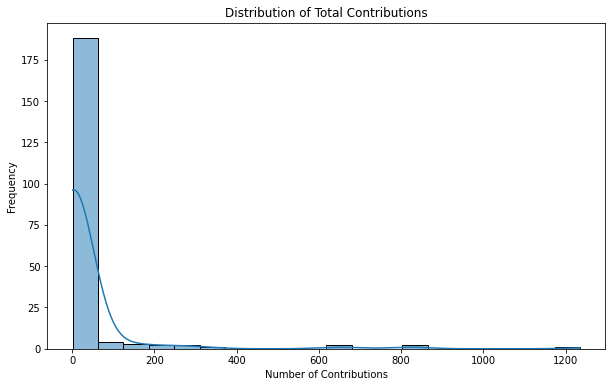

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Total Contributions'], kde=True, bins=20)
plt.title("Distribution of Total Contributions")
plt.xlabel("Number of Contributions")
plt.ylabel("Frequency")
plt.show()

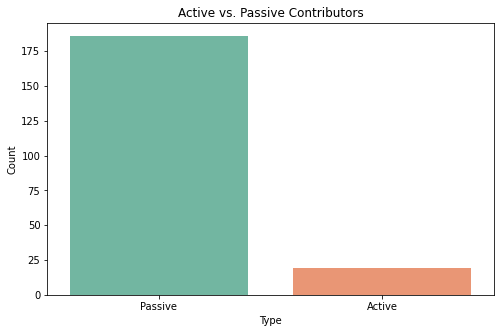

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Status', palette='Set2')
plt.title("Active vs. Passive Contributors")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

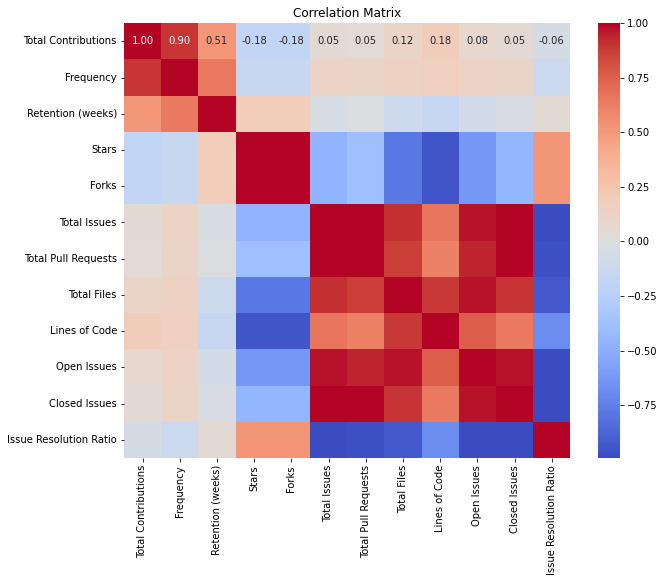

In [7]:
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

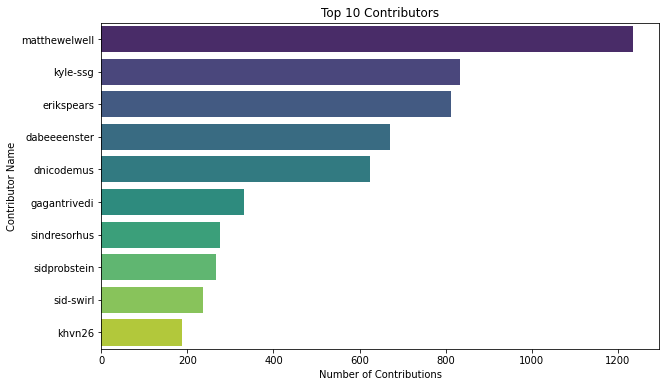

In [8]:
top_contributors = data.nlargest(10, 'Total Contributions')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='Total Contributions', y='Contributor', palette='viridis')
plt.title("Top 10 Contributors")
plt.xlabel("Number of Contributions")
plt.ylabel("Contributor Name")
plt.show()

In [9]:
# Step 3: Scatter Plots for Key Correlations
# Factors that correlate strongly with Retention (weeks)
strong_correlations = correlation_matrix['Retention (weeks)'].sort_values(ascending=False)

In [10]:
print("Strongly Correlated Factors with Retention (weeks):")
print(strong_correlations)

Strongly Correlated Factors with Retention (weeks):
Retention (weeks)         1.000000
Frequency                 0.649043
Total Contributions       0.509979
Stars                     0.187773
Forks                     0.187732
Issue Resolution Ratio    0.051601
Total Pull Requests      -0.017892
Closed Issues            -0.031865
Total Issues             -0.036313
Open Issues              -0.076286
Total Files              -0.112677
Lines of Code            -0.158248
Name: Retention (weeks), dtype: float64


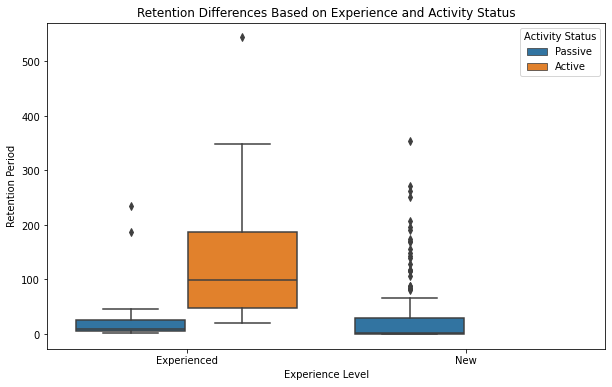

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the columns 'retention', 'experience', and 'activity_status'

# Create a boxplot to compare retention by experience and activity status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', y='Retention (weeks)', hue='Status', data=data)

# Set labels and title
plt.title('Retention Differences Based on Experience and Activity Status')
plt.xlabel('Experience Level')
plt.ylabel('Retention Period')
plt.legend(title='Activity Status')

# Show plot
plt.show()


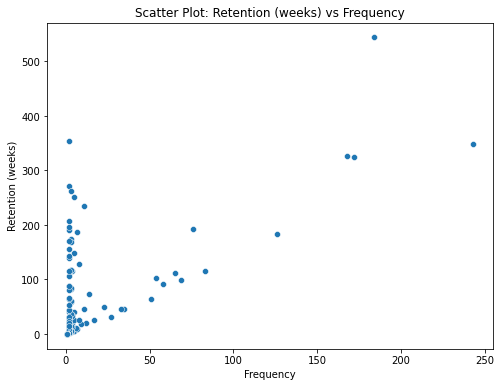

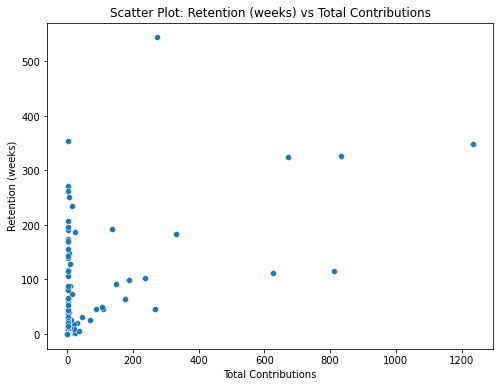

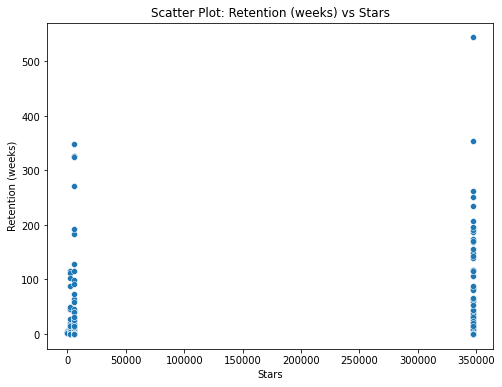

In [11]:
# Select the top 3 correlated factors for scatter plots
top_factors = strong_correlations.index[1:4]  # Exclude Retention itself

# Plot scatter plots
for factor in top_factors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[factor], y=data['Retention (weeks)'])
    plt.title(f"Scatter Plot: Retention (weeks) vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Retention (weeks)")
    plt.show()


In [12]:
# Step 5: Interpretation of Results
# Find actionable insights
insights = []
for factor, corr_value in strong_correlations.items():
    if abs(corr_value) > 0.5 and factor != 'Retention (weeks)':  # High correlation
        insights.append(f"Retention is strongly correlated with {factor} (Correlation: {corr_value:.2f})")

print("\nKey Insights:")
for insight in insights:
    print(insight)


Key Insights:
Retention is strongly correlated with Frequency (Correlation: 0.65)
Retention is strongly correlated with Total Contributions (Correlation: 0.51)
